# Overview 

Regression is a method to predict an dependent variable [for e.g. price]
by analyzing dependent variables [no. of bedrooms, previous cost etc.]

Relationship between the independent variable and the dependent variable. Positive relationship or negative relationship 

Take observations randomly, find a line that fits through the observiations. 

Minimize the erros between the observations betwee

y- dependent variable(prediction) = b0(y intercept) + b1X- independent variable (slope) 

grades vs time spent studying  

grades vs time on facebook 


# Brief 

Build a model that predicts the happiness of a country 
based on beer consumption


# Import libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.formula.api as smf

## Import Data

In [2]:
df = pd.read_csv('happiness.csv')

# EDA 

In [3]:
df.head(6)

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Senegal,Sub-Saharan Africa,north,4.219,499,0.953,9,1,7
1,Tanzania,Sub-Saharan Africa,south,3.666,533,0.878,36,6,1
2,Benin,Sub-Saharan Africa,north,3.484,512,0.789,34,4,13
3,Mali,Sub-Saharan Africa,north,4.073,421,0.780,5,1,1
4,Comoros,Sub-Saharan Africa,south,3.956,502,0.775,1,3,1
5,Haiti,Latin America and Caribbean,north,4.028,496,0.735,1,326,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 9 columns):
Country             122 non-null object
Region              122 non-null object
Hemisphere          122 non-null object
HappinessScore      122 non-null float64
HDI                 122 non-null int64
GDP_PerCapita       122 non-null float64
Beer_PerCapita      122 non-null int64
Spirit_PerCapita    122 non-null int64
Wine_PerCapita      122 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 8.7+ KB


# Visualize 

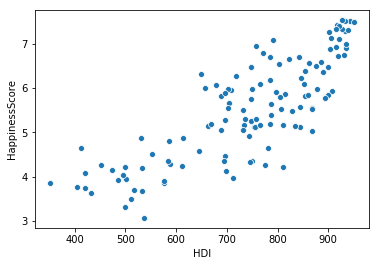

In [9]:
sns.scatterplot(x='HDI', y='HappinessScore', data = df)

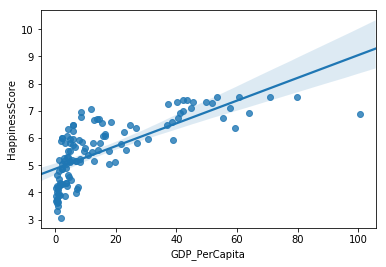

In [10]:
sns.regplot(x='GDP_PerCapita', y='HappinessScore', data = df)

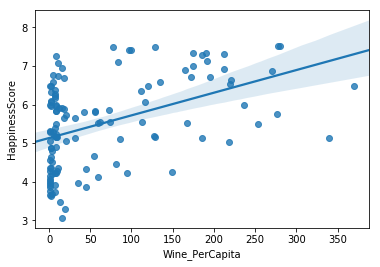

In [12]:
sns.regplot(x='Wine_PerCapita', y='HappinessScore', data = df)

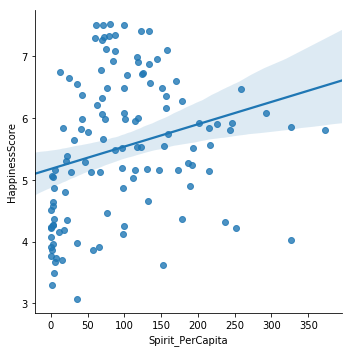

In [11]:
sns.lmplot(x='Spirit_PerCapita', y='HappinessScore', data = df)

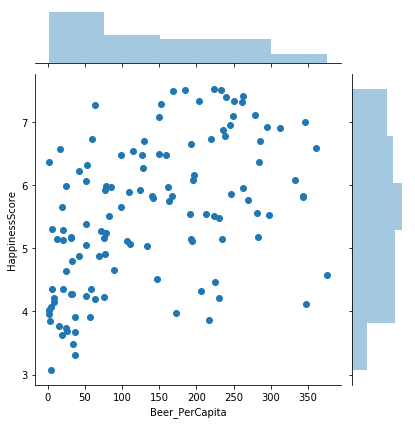

In [8]:
sns.jointplot(x='Beer_PerCapita', y='HappinessScore', data = df)

There is some linerity to it

# Build Model 

In [27]:
df.corr()

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
HappinessScore,1.000000,0.815163,0.721962,0.493367,0.256399,0.450589
HDI,0.815163,1.000000,0.712325,0.588394,0.393413,0.602561
GDP_PerCapita,0.721962,0.712325,1.000000,0.389962,0.079701,0.585861
Beer_PerCapita,0.493367,0.588394,0.389962,1.000000,0.364855,0.474274
Spirit_PerCapita,0.256399,0.393413,0.079701,0.364855,1.000000,0.118718
Wine_PerCapita,0.450589,0.602561,0.585861,0.474274,0.118718,1.000000


Happiness and Beer have a 0.5 correlation

# Split the Data into Training and test data

In [13]:
X = df[['Beer_PerCapita', 'GDP_PerCapita', 'Spirit_PerCapita', 'HDI']]
y = df[['HappinessScore']] 
X_train, X_test, y_train, y_test=train_test_split(X, y,test_size = 0.25, random_state = 123)

In [14]:
print (X_train.shape, y_train.shape) 
print (X_test.shape, y_test.shape)

(91, 4) (91, 1)
(31, 4) (31, 1)


We will need to combine X_train and y_train into a single training dataset called Train.

In [16]:
F

# Fit the model 

In [17]:
regression_model= regression_model.fit(X_train, y_train)

# Scoring the model

In [18]:
print('The R-squared is:', regression_model.score(X_train, y_train))

The R-squared is: 0.6655605451969686


R-squared is a statistical measure
of how close the data are to the fitted regression line. In other words R2 is the proportion of the explained variation divided by the total variation. In other words, if the R2 is close to one then it means that the model (in this case the five variables in X) explains the variation in happiness score around the globe. However, in this case the R2 = 0.68; which means that 68% of the variation in the happiness score around the globe is explained by the five variables in X.


In [19]:
print('Coefficients: \n', regression_model.coef_)

Coefficients: 
 [[ 0.0008629   0.01223152 -0.00010163  0.00447218]]


The Regression Coefficient is the constant 'b' in the regression 
equation that tells about the change in the value of dependent 
variable corresponding tothe unit change in the independent variable

In [20]:
print('Intercept: \n', regression_model.intercept_)

Intercept: 
 [1.94532495]


# Ordinary Least Squares (OLS) 

In [42]:
Train = pd.concat([X_train, y_train], axis=1)
Formula = 'HappinessScore ~ Beer_PerCapita + GDP_PerCapita + HDI + Spirit_PerCapita'


In [43]:
regression_model = smf.ols(Formula, 
                           data= Train).fit()

In [45]:
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:         HappinessScore   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     42.79
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           1.04e-19
Time:                        14:13:48   Log-Likelihood:                -84.935
No. Observations:                  91   AIC:                             179.9
Df Residuals:                      86   BIC:                             192.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.9453      0.489  

The p-values in this case are going to tell us which variables will be important to consider. For example, the p-value of beer consumption and spirit consumption indicate that these variables are not adding much value to the model. Why not try to run a model with only those variables that have a p-value lower than 0.01?

In [21]:
y_pred = regression_model.predict(X_test)
y_pred = pd.DataFrame(y_pred)

In [22]:
y_pred

,0
0,4.200394
1,5.391678
2,5.669238
3,5.497728
4,6.260669
5,6.795459
6,6.781360
7,4.377927
8,4.579411
9,6.697827


# Visualizing accuracy

In [23]:
y_test = y_test['HappinessScore'].reset_index()

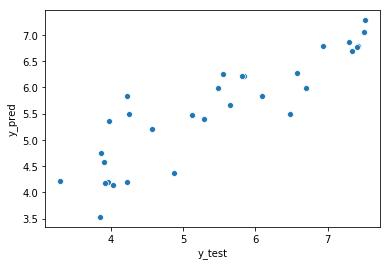

In [24]:
y_obs_pred = pd.concat([y_test['HappinessScore'], y_pred], axis =1)

y_obs_pred.columns = ['y_test', 'y_pred']

y_obs_pred['diff'] = y_obs_pred['y_test'] - y_obs_pred['y_pred']

r = sns.scatterplot(x='y_test', y='y_pred', data = y_obs_pred)

You will expect the distribution of the predictions and the test to be relatively linear if the model is performing well - a "perfect" model will be a line with slope = 1 and intercept = 0. This is not the case, but the scatter plot does show a relatively linear distribution. Perhaps beer consumption is not the best indicator of happiness score, as we see based on the R2 and coefficient.

# Measuring the root mean squared error (RMSE)

In [47]:
diff = y_obs_pred['y_pred'] - y_obs_pred['y_test']
diff_sq = diff**2
mean_diff_sq = diff_sq.mean()
RMSE = np.sqrt(mean_diff_sq)
RMSE

0.6610425476855996

This is the standard deviation of the residuals, and in this case is relatively small. It is even smaller than the model which only included beer consumption!